<a href="https://colab.research.google.com/github/vincimech010233/QuantumComputingJourney-/blob/main/What_Did_You_Expect%3F_Codercises_Pennylane_with_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pennylane qiskit qiskit_aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.wh

In [10]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


qc = QuantumCircuit(1, 1)

qc.rx(np.pi/4, 0)

qc.h(0)

qc.z(0)

qc.sdg(0)
qc.h(0)

qc.measure(0, 0)

simulator = AerSimulator()

compiled_qc = transpile(qc, simulator)

result = simulator.run(compiled_qc, shots=1024).result()

counts = result.get_counts(compiled_qc)
print(f"Resultados de la medición: {counts}")

expectation_value = (counts.get('0', 0) - counts.get('1', 0)) / 1024
print(f"Valor esperado de Pauli-Y: {expectation_value}")

Resultados de la medición: {'0': 155, '1': 869}
Valor esperado de Pauli-Y: -0.697265625


In [13]:
shot_values = [100, 1000, 10000, 100000, 1000000]

shot_results = []

def prepare_psi(qc):
    qc.rx(np.pi / 4, 0)

def y_basis_rotation(qc):
    qc.h(0)
    qc.s(0)

def measure_in_y_basis(shots):
    qc = QuantumCircuit(1, 1)

    prepare_psi(qc)

    qc.sdg(0)
    qc.h(0)

    qc.measure(0, 0)

    simulator = AerSimulator()

    compiled_qc = transpile(qc, simulator)

    result = simulator.run(compiled_qc, shots=shots).result()

    counts = result.get_counts(compiled_qc)

    expectation_value = (counts.get('0', 0) - counts.get('1', 0)) / shots

    return expectation_value

for shots in shot_values:
    result = measure_in_y_basis(shots)
    shot_results.append(result)

print(shot_results)

[-0.76, -0.702, -0.712, -0.70824, -0.708216]


In [16]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
import numpy as np

qc = QuantumCircuit(1, 1)

qc.rx(np.pi / 4, 0)

qc.h(0)

qc.z(0)

qc.sdg(0)
qc.h(0)

qc.measure(0, 0)

simulator = AerSimulator()

compiled_qc = transpile(qc, simulator)

result = simulator.run(compiled_qc, shots=100000).result()

counts = result.get_counts(compiled_qc)

samples = []
for state, count in counts.items():
    value = 1 if state == '0' else -1
    samples.extend([value] * count)
samples = np.array(samples)

def compute_expval_from_samples(samples):
    estimated_expval = np.mean(samples)
    return estimated_expval

estimated_expval = compute_expval_from_samples(samples)
print(f"Valor esperado de Pauli-Y: {estimated_expval}")

Valor esperado de Pauli-Y: -0.70704


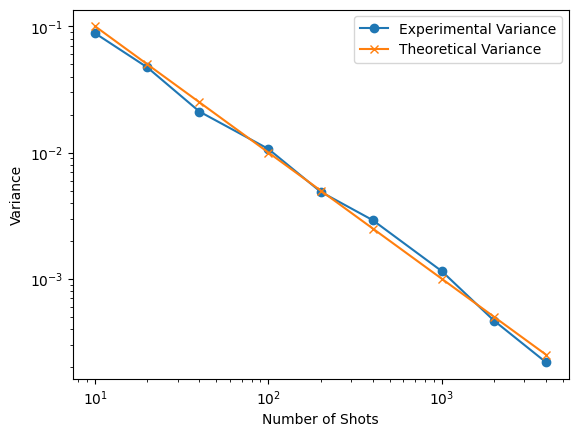

In [19]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    n_trials = 100

    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.measure(0, 0)

    simulator = AerSimulator()

    compiled_qc = transpile(qc, simulator)

    results = []
    for _ in range(n_trials):
        result = simulator.run(compiled_qc, shots=n_shots).result()
        counts = result.get_counts(compiled_qc)
        expval = (counts.get('0', 0) - counts.get('1', 0)) / n_shots
        results.append(expval)

    return np.var(results)

def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """
    return 1 / n_shots

shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]

plt.plot(shot_vals, results_experiment, 'o-', label='Experimental Variance')
plt.plot(shot_vals, results_scaling, 'x-', label='Theoretical Variance')
plt.xlabel('Number of Shots')
plt.ylabel('Variance')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()